In [39]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../data/levelized-cost-of-energy.csv')
# data = data.fillna(data[columns].mean())
df = df[df["Year"] > 2000]
df = df[df["Entity"]== "World"]

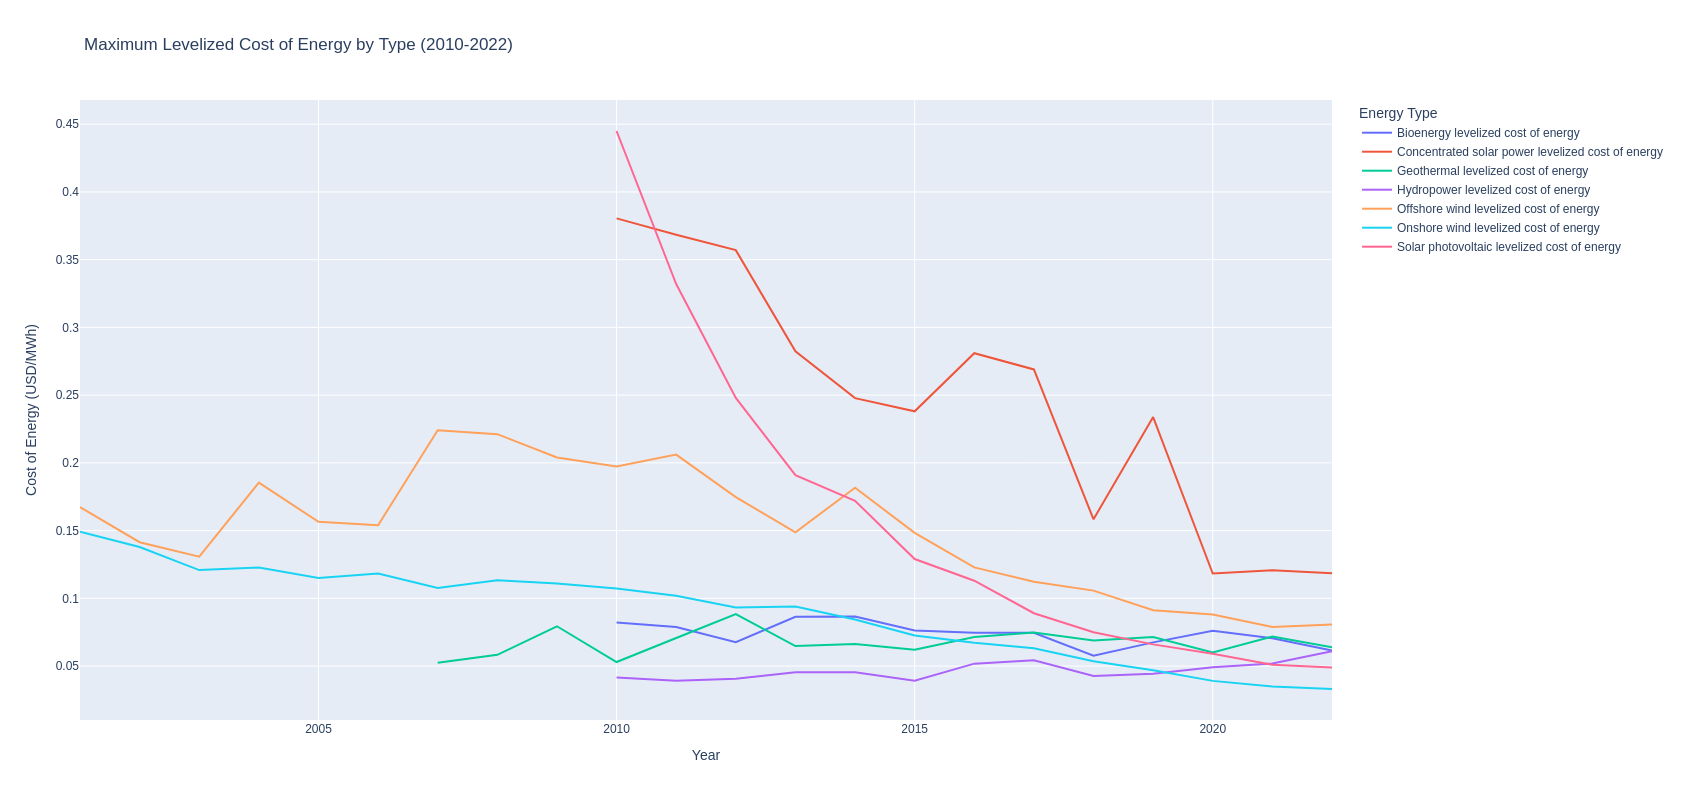

In [40]:
# Drop rows where all specified columns have NaN values
columns_to_check = [
    'Bioenergy levelized cost of energy', 
    'Geothermal levelized cost of energy', 
    'Offshore wind levelized cost of energy', 
    'Solar photovoltaic levelized cost of energy', 
    'Concentrated solar power levelized cost of energy', 
    'Hydropower levelized cost of energy', 
    'Onshore wind levelized cost of energy'
]
df = df.dropna(subset=columns_to_check, how='all')

# Interpolate 'Geothermal levelized cost of energy' for years between 2010 and 2015
mask = (df['Year'] >= 2010) & (df['Year'] <= 2015)
df.loc[mask, 'Geothermal levelized cost of energy'] = df.loc[mask, 'Geothermal levelized cost of energy'].interpolate(method='linear')

# Melt the DataFrame to a long format for Plotly
df_long = df.melt(id_vars=['Year'], 
                  value_vars=columns_to_check, 
                  var_name='Energy Type', 
                  value_name='Cost of Energy')

# Group by Year and Energy Type, and find the maximum cost for each group
df_max = df_long.groupby(['Year', 'Energy Type']).max().reset_index()

# Plot the data using Plotly
fig = px.line(df_max, x='Year', y='Cost of Energy', color='Energy Type',
              title='Maximum Levelized Cost of Energy by Type (2010-2022)',
              labels={'Cost of Energy': 'Cost of Energy (USD/MWh)'},
              width=1500, height=800)

# Show the plot
fig.show()